DEP INTRNSHIP TASK 04: IMAGE CLASSIFICATION USING DEEP LEARNING MODELS ON CIFER-10 DATASET   
CREATED BY SYED HAMMAD JAVED MACHINE LEARNING INTERN AUG BATCH



IMPORTING NECESSARY LIBRARIES

In [21]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
import  numpy as np
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

LOADING CIFER-10 DATASET

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


EXPLORING DATASET

In [3]:
print("Training data shape:", X_train.shape)
print("Training labels shape:", y_train.shape)
print("Testing data shape:", X_test.shape)
print("Testing labels shape:", y_test.shape)

Training data shape: (50000, 32, 32, 3)
Training labels shape: (50000, 1)
Testing data shape: (10000, 32, 32, 3)
Testing labels shape: (10000, 1)


In [4]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


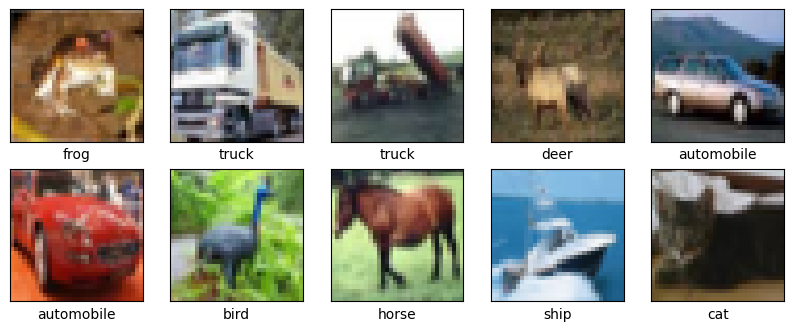

In [5]:
plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i])
    plt.xlabel(class_names[y_train[i][0]])
plt.show()

In [10]:
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

NORMALIZATION OF DATASET

In [6]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0


In [11]:
y_train = y_train.flatten()
y_test = y_test.flatten()

In [13]:
y_train_one_hot = to_categorical(y_train, 10)
y_test_one_hot = to_categorical(y_test, 10)


TRAINING  MODEL

In [17]:
simple_model = Sequential([
    Flatten(input_shape=(32, 32, 3)),
    Dense(512, activation='relu'),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

In [18]:
simple_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [19]:
simple_model.fit(X_train, y_train_one_hot, epochs=10, validation_data=(X_test, y_test_one_hot))


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 25ms/step - accuracy: 0.2824 - loss: 1.9958 - val_accuracy: 0.3680 - val_loss: 1.7658
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 24ms/step - accuracy: 0.3913 - loss: 1.6957 - val_accuracy: 0.4232 - val_loss: 1.6036
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 24ms/step - accuracy: 0.4234 - loss: 1.6053 - val_accuracy: 0.4445 - val_loss: 1.5657
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 24ms/step - accuracy: 0.4379 - loss: 1.5485 - val_accuracy: 0.4268 - val_loss: 1.5877
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 43s 26ms/step - accuracy: 0.4593 - loss: 1.5119 - val_accuracy: 0.4653 - val_loss: 1.5150
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 24ms/step - accuracy: 0.4653 - loss: 1.4924 - val_accuracy: 0.4623 - val_loss: 1.5167
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 24ms/step - accuracy: 0.4766 - loss: 1.4655 - val_accuracy: 0.4698 - val_loss: 1.4885
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 37s 24ms/step - accuracy: 0.4852 -

In [20]:
simple_model_loss, simple_model_acc = simple_model.evaluate(X_test, y_test_one_hot)
print(f'Simple Model Accuracy: {simple_model_acc:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.4758 - loss: 1.4674
Simple Model Accuracy: 0.4782


BUILDING CNN MODEL FOR IMAGE CLASSIFICATION

In [23]:
cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

In [24]:
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [25]:
cnn_model.fit(X_train, y_train_one_hot, epochs=20, validation_data=(X_test, y_test_one_hot))


Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 179s 113ms/step - accuracy: 0.3341 - loss: 1.7969 - val_accuracy: 0.5765 - val_loss: 1.1972
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 182s 100ms/step - accuracy: 0.5617 - loss: 1.2156 - val_accuracy: 0.6540 - val_loss: 0.9794
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 201s 100ms/step - accuracy: 0.6306 - loss: 1.0407 - val_accuracy: 0.7052 - val_loss: 0.8493
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 204s 101ms/step - accuracy: 0.6581 - loss: 0.9641 - val_accuracy: 0.7147 - val_loss: 0.8139
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 157s 101ms/step - accuracy: 0.6761 - loss: 0.9152 - val_accuracy: 0.7161 - val_loss: 0.8119
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 159s 102ms/step - accuracy: 0.6947 - loss: 0.8762 - val_accuracy: 0.7331 - val_loss: 0.7673
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 204s 103ms/step - accuracy: 0.7058 - loss: 0.8399 - val_accuracy: 0.7356 - val_loss: 0.7627
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 201s 102ms/step - ac

In [26]:
cnn_model_loss, cnn_model_acc = cnn_model.evaluate(X_test, y_test_one_hot)
print(f'CNN Model Accuracy: {cnn_model_acc:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - accuracy: 0.7687 - loss: 0.6705
CNN Model Accuracy: 0.7662


In [41]:
print(f'Simple Model Accuracy: {simple_model_acc:.4f}')
print(f'CNN Model Accuracy: {cnn_model_acc:.4f}') # Use cnn_model_acc instead of cnn_model


Simple Model Accuracy: 0.4782
CNN Model Accuracy: 0.7662


MAKING PREDICTION ON OUR TRAINED CNN MODEL

In [44]:
predictions = cnn_model.predict(X_test[:10])
predicted_classes = np.argmax(predictions, axis=1)
print("Predicted labels:", [class_names[i] for i in predicted_classes])
print("Actual labels:   ", [class_names[i] for i in y_test[:10].flatten()])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Predicted labels: ['cat', 'automobile', 'ship', 'ship', 'frog', 'frog', 'automobile', 'frog', 'cat', 'automobile']
Actual labels:    ['cat', 'ship', 'ship', 'airplane', 'frog', 'frog', 'automobile', 'frog', 'cat', 'automobile']


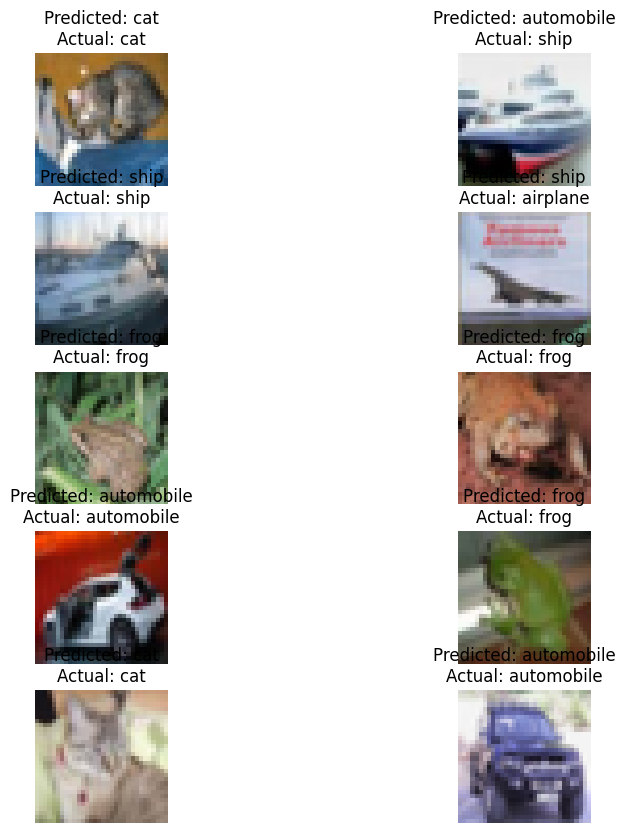

In [47]:
plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(5, 2, i+1)
    plt.imshow(X_test[i])
    # Remove the [0] since y_test is 1-dimensional
    plt.title(f"Predicted: {class_names[predicted_classes[i]]}\nActual: {class_names[y_test[i]]}")
    plt.axis('off')
plt.show()
